# 모듈 설치

In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user
!pip install pycaret
!pip install catboost
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=19b10287bb753f19c34e549993bf147c61f40cc0adb47eede4ccf51f5888afd6
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 69.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
Looking 

# 데이터준비

In [1]:
import pandas as pd

data_path= '/content/drive/MyDrive/Cloud_Ai/3.머신러닝/res/PG2'

train=pd.read_csv(data_path+'/train.csv')
test=pd.read_csv(data_path+'/test.csv')
submission=pd.read_csv(data_path+'/sample_submission.csv')

FileNotFoundError: ignored

In [ ]:
train.shape,test.shape

((15304, 12), (10204, 11))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  object 
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  object 
 6   work_type          10204 non-null  object 
 7   Residence_type     10204 non-null  object 
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 877.0+ KB


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10204 non-null  int64  
 1   stroke  10204 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 159.6 KB


In [ ]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


In [ ]:
train.shape, test.shape, submission.shape

((15304, 12), (10204, 11), (10204, 2))

## 추가 데이터

- 캐글에서 원본데이터를 찾아추가하려고 한다

In [ ]:
train2=pd.read_csv(data_path+'/healthcare-dataset-stroke-data.csv')

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- info()를 보면 bmi에 결측치가 존재한다

- 결측치를 제거하기 위해 최근접 이웃 알고리즘(KNN)을 이용하여 결측치가 들어간 부분을 채울 것이다.

In [ ]:
# 결측치를 KNN을 이용하여 채우기 위한 함수
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [ ]:
# 결측치가 있는 칸을 함수를 사용해서 채운다
import numpy as np
na_cols = [col for col in train2.columns if train2[col].isnull().sum()!=0]

for col in na_cols:  
    train2 = knn_impute(train2, col)


NameError: ignored

In [ ]:
# concat을 사용하여 train데이터와 원본 데이터를 합친다
train=pd.concat([train,train2],axis=0).reset_index(drop=True)

# EDA

## 이진형

- hypertension,heart_disease 는 아예 0,1로 값이 이루어져있다
- ever_married는 Yes,No로 이루어져있어 0과 1로 바꿔야한다
- Residence_type는 Urban, Rural로 이루어져 있으니 0과 1로 바꿔야한다

- gender도 이진이지만 other데이터하나가 껴있다
  - 그렇기 때문에 other를 Female로 바꾸어 넣을것이다

In [ ]:
train.hypertension.unique()

array([0, 1])

In [ ]:
train.gender.unique() #train 데이터안 성별에 other가 들어가있다

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
test.gender.unique() # test데이터도 성별에 other가 들어가있다

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
train.heart_disease.unique()

array([0, 1])

In [ ]:
train.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
train.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

- 성별의 이상치인 other를 female로 바꾼다

In [ ]:
for n in range(20414):
  if train.gender[n] == 'Other':
    train.gender[n] = 'Female'

for n in range(10204):
  if test.gender[n] == 'Other':
    test.gender[n] = 'Female'

<ipython-input-22-c241837d1878>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.gender[n] = 'Female'
<ipython-input-22-c241837d1878>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.gender[n] = 'Female'


## 명목형

- work_type  (명목형)

- age,avg_glucose_level,bmi (수치형)

In [ ]:
train.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
train.age.unique(),train.avg_glucose_level.unique(),train.bmi.unique()

(array([2.80e+01, 3.30e+01, 4.20e+01, 5.60e+01, 2.40e+01, 3.40e+01,
        5.30e+01, 7.80e+01, 4.50e+01, 6.20e+01, 5.10e+01, 4.00e+00,
        2.30e+01, 3.60e+01, 5.90e+01, 4.00e+01, 4.70e+01, 3.10e+01,
        1.72e+00, 7.10e+01, 5.00e+01, 5.50e+01, 3.80e+01, 5.70e+01,
        1.20e+01, 6.10e+01, 4.80e+01, 1.70e+01, 5.80e+01, 2.60e+01,
        8.00e+00, 2.00e+00, 3.90e+01, 5.20e+01, 1.90e+01, 5.40e+01,
        7.20e+01, 1.50e+01, 1.10e+01, 7.60e+01, 8.20e+01, 1.80e+01,
        7.40e+01, 4.30e+01, 2.10e+01, 6.50e+01, 9.00e+00, 8.00e+01,
        6.80e+01, 4.40e+01, 3.20e+01, 7.00e+00, 2.50e+01, 7.90e+01,
        6.30e+01, 5.00e+00, 8.10e+01, 1.00e+01, 3.00e+00, 6.00e+01,
        4.90e+01, 3.20e-01, 6.00e+00, 7.00e+01, 7.30e+01, 2.00e+01,
        4.60e+01, 3.70e+01, 6.70e+01, 2.90e+01, 6.90e+01, 1.32e+00,
        3.00e+01, 1.40e+01, 7.50e+01, 2.20e+01, 2.70e+01, 7.70e+01,
        3.50e+01, 6.60e+01, 1.80e+00, 1.88e+00, 8.80e-01, 1.30e+01,
        1.48e+00, 4.10e+01, 6.40e+01, 1.30e+00, 

## 순서형

- smoking_status
  - - 'never smoked', 'formerly smoked', 'Unknown', 'smokes' (unknown 순서를 어디다 두어야할지 정해야함)

In [ ]:
train.smoking_status.unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

# 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

타겟값간 비율 22.171396140749152


Text(0.5, 1.0, 'Target Value Distribution')

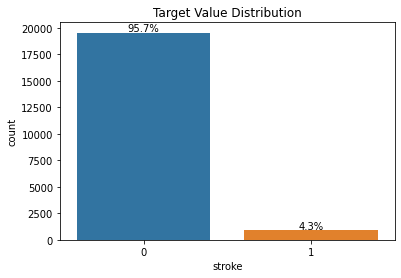

In [ ]:
# 향후 시각화 자료에 비율을 표기하는 부분을 추가 => 텍스트 드로잉
def show_text_percent_by_targert( ax, total_count, is_show=True,  ):
  '''
    is_show : True일대만 텍스트가 노출되게 처리
    ax : 텍스트를 그리고자 하는 차트의 축정보
    total_count : 전체 카운트수
  '''
  persents = list()         # 비율을 담는 그릇
  # 카운트 플롯 차트상에 개별 박스 정보를 구하는 방법 -> ax.patches

  # 카운트 플롯 차트상에서 순차적으로 박스를 하나식 추출한다
  for patch in ax.patches: # 차트상에 존재하는 모든 형태의 도형을 차례대로 추출하는 연속형 변수
    w = patch.get_width()  # 타겟값 0 혹은 1, 카운트 플롯의 개별 박스 너비
    h = patch.get_height() # 타겟값 0 혹은 1의 카운트수 -> 카운트 플롯의 개별 박스 높이->카운트
    p = h/total_count * 100 # 타깃값의 비율 = (개별박스의 높이(카운트) / 전체카운트)*100
    persents.append( p )
    # 텍스트 그리기
    # 좌표 정보 획득
    l = patch.get_x()    # 도형 왼쪽 테투리 X축의 기준 위치값    
    ax.text(  x=l + w/2,  # 도형의 정 가운데를 X축 좌표
              y=h + total_count*0.005, # 1, total_count(가변값)의 특정 비율로 올려서 위치를 조정
              s=f'{p:1.1f}%', # 타겟값의 비율을 개별 차트내 도형 위에 그려지는 내용 ex) 38.8%
              ha='center'    # 정렬(가운데)
            )
  if is_show:
    if len(persents) == 2:   # 타겟용
      print( '타겟값간 비율', persents[0]/persents[1] )
    elif len(persents) == 4: # 이진 피처용
      # print( persents )
      # 타겟값에 맞춰서 도형이 그려진다 0번 타겟이 먼저 그려지고, 1번 타겟이 나중에 그려진다
      print( persents[0]/persents[2], persents[1]/persents[3] )
  pass

ax = sns.countplot( data=train, x='stroke');
show_text_percent_by_targert( ax, train.shape[0] )
ax.set_title('Target Value Distribution')

## 이진형
- hypertension, heart_disease , ever_married ,gender,Residence_type

26.882096069868997 5.489690721649484


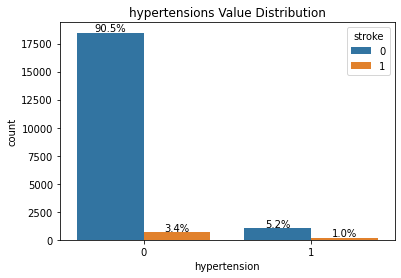

In [ ]:
ax = sns.countplot( data=train, x='hypertension', hue='stroke' );
show_text_percent_by_targert( ax, train.shape[0] )
ax.set_title('hypertensions Value Distribution')
plt.show()

24.756510416666668 4.601769911504425


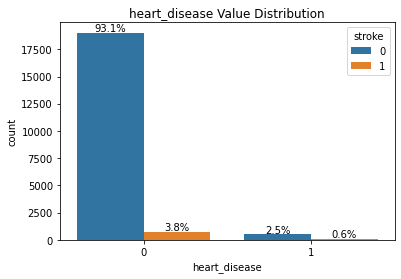

In [ ]:
ax = sns.countplot( data=train, x='heart_disease', hue='stroke' );
show_text_percent_by_targert( ax, train.shape[0] )
ax.set_title('heart_disease Value Distribution')
plt.show()

15.939580764488285 94.37142857142858


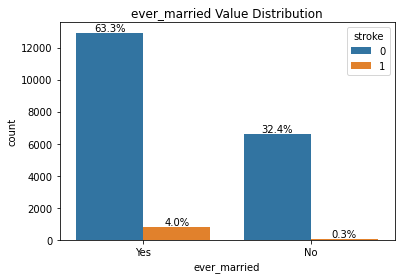

In [ ]:
ax = sns.countplot( data=train, x='ever_married', hue='stroke' );
show_text_percent_by_targert( ax, train.shape[0] )
ax.set_title('ever_married Value Distribution')
plt.show()

21.746666666666666 22.614849187935036


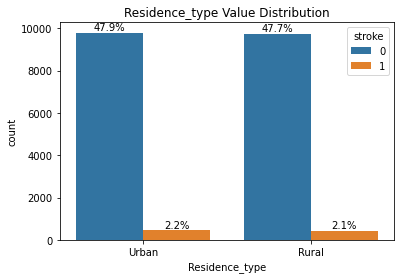

In [ ]:
ax = sns.countplot( data=train, x='Residence_type', hue='stroke' );
show_text_percent_by_targert( ax, train.shape[0] )
ax.set_title('Residence_type Value Distribution')
plt.show()

- Residence_type은 Urban이나 Rural나 0과 1의 비율차이가 없다
  - 이 피처는 변별력이 떨어진다
    - 피처를 제거하는 편이 정확도가 올라갈 것

## 명목
- work_type 
- age, avg_glucose_level, bmi

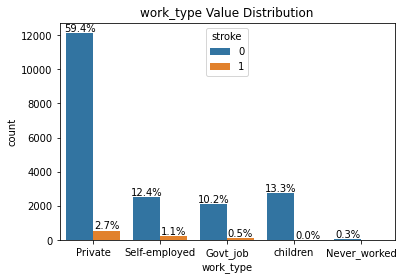

In [ ]:
ax = sns.countplot( data=train, x='work_type', hue='stroke' );
show_text_percent_by_targert( ax, train.shape[0] )
ax.set_title('work_type Value Distribution')
plt.show()

- 수치형은 컬럼이 너무많아 생략했다.
- 겹치는 값이 별로 안보이므로 변별력은 있을것이다

## 순서형

In [ ]:
import matplotlib.gridspec as gridspec # 격자 배치용

In [ ]:
def show_pointplot( feature, cross_tab, color, ax=None ):
  if ax:
    sns.pointplot(   x=feature,             # 피처값
                  y=1,            # 정답 1에 대한 포인트 플롯
                  data=cross_tab, # 그리는 대상 df
                  order=cross_tab[feature],     # 포인트플롯 순서
                  color=color,    # 그리는 색상
                  ax=ax
                  );

In [ ]:
def make_cross_tab( df , feature_name ):
  cross_tab = pd.crosstab( df[feature_name], df['stroke'], normalize='index' ) * 100
  cross_tab.reset_index( inplace=True )
  return cross_tab

In [ ]:
def show_count_point_plot( all_data, features, rows=3, cols=2 ):
  # 1개의 차트에 격자로 분할 -> 각 자리에 ax를 전달 -> 이것을 이용하여 그린다
  plt.figure( figsize=(25, 20) ) # 그리면서 조정 : 세로 3칸, 가로 2칸
  # 서브플롯 배치 
  p_grid = gridspec.GridSpec(rows, cols)  # 3줄, 2칸 => 차트 5개 => 피처가 5개

  for idx, feature in enumerate( features ):
    ax = plt.subplot( p_grid[idx] )
    cross_tab = make_cross_tab( all_data, feature )
    # order를 사용 했으면 한차트에 사용되는 모든 함수는 같은 순서(order) 유지 해야 동일하게 배치됨
    sns.countplot( data=all_data, x=feature, ax=ax, order=cross_tab[feature] )  # ax=ax : 격자 안에서 특정 위치로 차트가 세팅
    show_text_percent_by_targert( ax, all_data.shape[0] )
    ax.set_title(f'{ feature }\'s Value Distribution')
    show_pointplot( feature, cross_tab, 'blue', ax.twinx() )
  plt.show()

In [ ]:
ord_features = ['smoking_status']

0.7447693625351769 1.0989085948158253


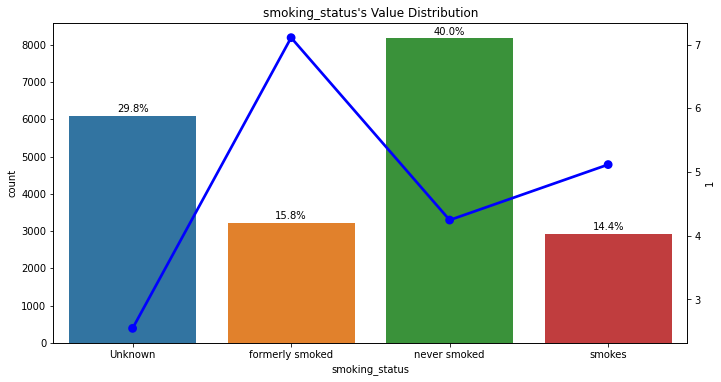

In [ ]:
show_count_point_plot( train, ord_features)

- never smoked -> formerly smoked -> smokes는 순서형으로 볼수 있다.
- 하지만 Unknown은 어디에 들어갈지 모른다
  - 위의 시각화를 토대로 카운트가 많은 순으로 순서형을 하려고 한다

- 그래서 순서형의 순서는 never smoked ->Unknown -> formerly smoked -> smokes
으로 한다

# 인코딩

## 이진형

- 이진형중 0과 1로 이루어지지 않은 값들을 변환 매칭 테이블을 사용해 바꾼다

In [ ]:
train['gender'] = train['gender'].map( {'Male':1, 'Female':0})
train['ever_married']=train['ever_married'].map( {'Yes':1, 'No':0})

test['gender'] = test['gender'].map( {'Male':1, 'Female':0})
test['ever_married']=test['ever_married'].map( {'Yes':1, 'No':0})

bin_feats=['hypertension','heart_disease','ever_married' , 'gender']

## 명목형

- 글로 이루어진 work_type만 인코딩한다

In [ ]:
# work_type을 get_dummies를 사용하여 원-핫 인코딩한다음 난수를 부여해 데이터프레임으로 만든다
nom_train = pd.get_dummies(train['work_type'])
nom_test = pd.get_dummies(test['work_type'])

## 순서형

In [ ]:
ord_feat=['smoking_status']
ord_dict = { 'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3}
train['smoking_status'] = train['smoking_status'].map( ord_dict )
test['smoking_status'] = test['smoking_status'].map( ord_dict )
ord_train_sample = train[ ord_feat]
ord_test_sample = test[ ord_feat]

# 피처스케일링

- 명목형중 수치로 이루어진 피처들의 값이 커 MinMaxScaler를 사용할것이다

In [ ]:
# 수치형 피처들
nom_etc_feats = ['age','avg_glucose_level','bmi']

# 수치형 스케일링
alpha_enc = MinMaxScaler()
temp_alpha = pd.concat( [ train[ nom_etc_feats ], test[ nom_etc_feats ] ] )
alpha_enc.fit( temp_alpha )
enc_nom_etc_train = alpha_enc.transform( train[ nom_etc_feats ]  )
enc_nom_etc_test  = alpha_enc.transform( test[ nom_etc_feats ] )

nom_etc_test=pd.DataFrame( enc_nom_etc_test)
nom_etc_test.rename(columns = { 0:'age'}, inplace = True)
nom_etc_test.rename(columns = {1 : 'avg_glucose_level'}, inplace = True)

nom_etc_train=pd.DataFrame( enc_nom_etc_train)
nom_etc_train.rename(columns = {0 : 'age'}, inplace = True)
nom_etc_train.rename(columns = {1 : 'avg_glucose_level'}, inplace = True)

NameError: ignored

# 데이터 병합

In [ ]:
# 데이터 병합. 최종 train 데이터와 test 데이터 생성
final_train_data = pd.concat([train[bin_feats],nom_etc_train,nom_train,ord_train_sample],axis=1)
final_test_data = pd.concat([test[bin_feats],nom_etc_test,nom_test,ord_test_sample],axis=1)

# 파이캐럿에서 직접모델 선정후 학습-예측

In [ ]:
from pycaret.classification import *
from xgboost import XGBClassifier

X = final_train_data
y = train['stroke']
X_train, X_test, y_train, y_test = train_test_split(  X, y, 
                                                     test_size=0.15, stratify=y, random_state=0 )

target_name = 'stroke' 
clf = setup(  data = pd.concat([final_test_data,train['stroke']],axis=1),               # 데이터
              target=target_name,     # 정답 피처명
              silent=True,            # 데이터 조정은 알아서
              verbose=True,           # 로그출력
              train_size = 0.9,       # 훈련 데이터 비율
              data_split_shuffle=False,   # 스플릿 할때 섞는 여부
              normalize = True,       # 정규화 할것인지
              session_id=100          # 난수시드
            )
model_xgb       = create_model('xgboost', fold = 5)
tune_model_xgb      = tune_model(model_xgb,       fold=5, optimize = 'AUC', choose_better = True)

eval_set=[(X_test, y_test)]
xgb_clf_model = tune_model_xgb
xgb_clf_model.fit(X, y, 
    # 조기학습 종료 체크는 검증용 데이터로 수행한다,. 
    early_stopping_rounds=100, eval_metric='logloss', eval_set=eval_set, # 3개는 같이 움직임
    verbose=True # 로그 출력             
)
y_pred=xgb_clf_model.predict_proba( final_test_data )[:, 1]
submission['stroke'] = y_pred
submission.to_csv('submission_ver11.csv',index=False)

# 총합 코드

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from pycaret.classification import *

data_path= '/content/drive/MyDrive/Cloud_Ai/3.머신러닝/res/PG2'

train=pd.read_csv(data_path+'/train.csv')
train2=pd.read_csv(data_path+'/healthcare-dataset-stroke-data.csv')
test=pd.read_csv(data_path+'/test.csv')
submission=pd.read_csv(data_path+'/sample_submission.csv')

def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

na_cols = [col for col in train2.columns if train2[col].isnull().sum()!=0]

for col in na_cols:  
    train2 = knn_impute(train2, col)

train=pd.concat([train,train2],axis=0).reset_index(drop=True)

# other 그냥 female로 바꿈
for n in range(20414):
  if train.gender[n] == 'Other':
    train.gender[n] = 'Female'

for n in range(10204):
  if test.gender[n] == 'Other':
    test.gender[n] = 'Female'

# 이진형
train['gender'] = train['gender'].map( {'Male':1, 'Female':0})
train['ever_married']=train['ever_married'].map( {'Yes':1, 'No':0})

test['gender'] = test['gender'].map( {'Male':1, 'Female':0})
test['ever_married']=test['ever_married'].map( {'Yes':1, 'No':0})


# 이진형 피처들
bin_feats=['hypertension','heart_disease','ever_married' , 'gender']

# work_type을 원-핫 인코딩
nom_train = pd.get_dummies(train['work_type'])
nom_test = pd.get_dummies(test['work_type'])


# 수치형 피처들
nom_etc_feats = ['age','avg_glucose_level','bmi']

# 수치형 스케일링
alpha_enc = MinMaxScaler()
temp_alpha = pd.concat( [ train[ nom_etc_feats ], test[ nom_etc_feats ] ] )
alpha_enc.fit( temp_alpha )
enc_nom_etc_train = alpha_enc.transform( train[ nom_etc_feats ]  )
enc_nom_etc_test  = alpha_enc.transform( test[ nom_etc_feats ] )

nom_etc_test=pd.DataFrame( enc_nom_etc_test)
nom_etc_test.rename(columns = { 0:'age'}, inplace = True)
nom_etc_test.rename(columns = {1 : 'avg_glucose_level'}, inplace = True)

nom_etc_train=pd.DataFrame( enc_nom_etc_train)
nom_etc_train.rename(columns = {0 : 'age'}, inplace = True)
nom_etc_train.rename(columns = {1 : 'avg_glucose_level'}, inplace = True)

# 순서형
ord_feat=['smoking_status']
ord_dict = { 'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3}
train['smoking_status'] = train['smoking_status'].map( ord_dict )
test['smoking_status'] = test['smoking_status'].map( ord_dict )
ord_train_sample = train[ ord_feat]
ord_test_sample = test[ ord_feat]



# 데이터 병합. 최종 train 데이터와 test 데이터 생성
final_train_data = pd.concat([train[bin_feats],nom_etc_train,nom_train,ord_train_sample],axis=1)
final_test_data = pd.concat([test[bin_feats],nom_etc_test,nom_test,ord_test_sample],axis=1)

X = final_train_data
y = train['stroke']
X_train, X_test, y_train, y_test = train_test_split(  X, y, 
                                                     test_size=0.15, stratify=y, random_state=0 )

target_name = 'stroke' # malignant
clf = setup(  data = pd.concat([final_test_data,train['stroke']],axis=1),               # 데이터
              target=target_name,     # 정답 피처명
              silent=True,            # 데이터 조정은 알아서
              verbose=True,           # 로그출력
              train_size = 0.9,       # 훈련 데이터 비율
              data_split_shuffle=False,   # 스플릿 할때 섞는 여부
              normalize = True,       # 정규화 할것인지
              session_id=100          # 난수시드
            )
model_xgb       = create_model('xgboost', fold = 5)
tune_model_xgb      = tune_model(model_xgb,       fold=5, optimize = 'AUC', choose_better = True)

eval_set=[(X_test, y_test)]
xgb_clf_model = tune_model_xgb
xgb_clf_model.fit(X, y, 
    # 조기학습 종료 체크는 검증용 데이터로 수행한다,. 
    early_stopping_rounds=100, eval_metric='logloss', eval_set=eval_set, # 3개는 같이 움직임
    verbose=True # 로그 출력             
)
y_pred=xgb_clf_model.predict_proba( final_test_data )[:, 1]
submission['stroke'] = y_pred
submission.to_csv('submission_S3E2.csv',index=False)